In [2]:
import numpy as np
from qiskit.transpiler import CouplingMap
import rustworkx as rx


def crop_coupling_map(coupling_map, crop_size, seed=None):
    assert crop_size <= coupling_map.size(), "Crop size must be less than or equal to the coupling map size."
    np.random.seed(seed)
    all_physical_qubits = list(coupling_map.physical_qubits)
    while True:
        np.random.shuffle(all_physical_qubits)
        physical_qubits = all_physical_qubits[:crop_size]
        if rx.is_connected(coupling_map.graph.to_undirected().subgraph(physical_qubits)):
            break

    from qiskit.transpiler import CouplingMap
    map = CouplingMap.from_line(10)
    map.graph.sub


In [21]:
map = CouplingMap.from_grid(2, 3)
CouplingMap(map.graph.subgraph([1,2,4,5]).edge_list()).graph.edge_list()

EdgeList[(0, 2), (2, 0), (0, 1), (1, 0), (1, 3), (3, 1), (2, 3), (3, 2)]

In [12]:
map.graph.edge_list()

EdgeList[(0, 3), (3, 0), (0, 1), (1, 0), (1, 4), (4, 1), (1, 2), (2, 1), (2, 5), (5, 2), (3, 4), (4, 3), (4, 5), (5, 4)]

In [42]:
l = rx.connected_subgraphs(map.graph.to_undirected(), 3)
l

[[2, 0, 1],
 [0, 1, 4],
 [0, 1, 3],
 [0, 3, 4],
 [2, 1, 5],
 [4, 2, 1],
 [4, 3, 1],
 [4, 1, 5],
 [2, 5, 4],
 [4, 3, 5]]

In [46]:
np.random.choice(2)

1

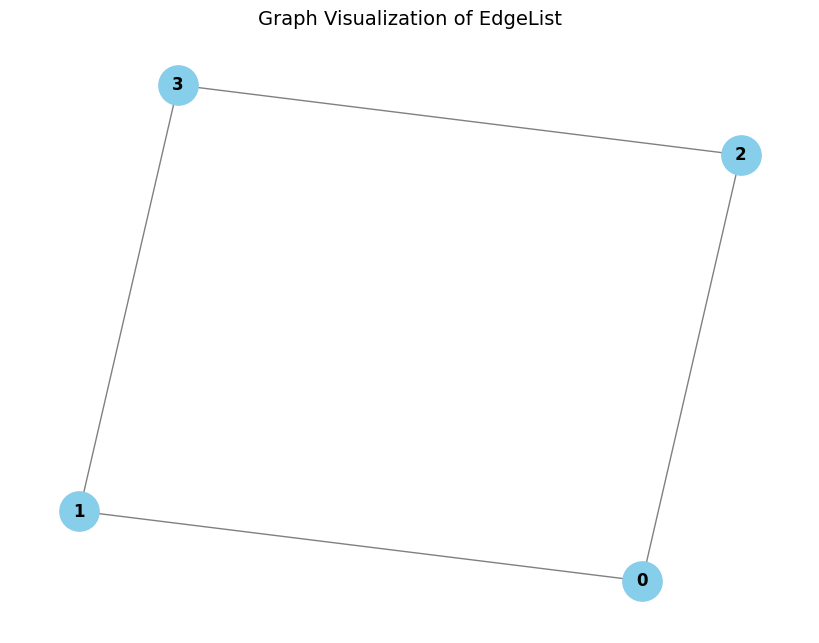

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义边列表（已处理为小节点在前）
# edges = [
#     (0, 3), (0, 1), (1, 4), (1, 2), 
#     (2, 5), (3, 4), (4, 5)
# ]
edges = [(0, 2), (2, 0), (0, 1), (1, 0), (1, 3), (3, 1), (2, 3), (3, 2)]
edges = [(0, 2), (2, 0), (0, 1), (1, 0), (1, 3), (3, 1), (2, 3), (3, 2)]
# 创建无向图
G = nx.Graph()
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # 使用弹簧布局算法
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='skyblue', 
    node_size=800, 
    edge_color='gray', 
    font_size=12,
    font_weight='bold'
)
plt.title("Graph Visualization of EdgeList", fontsize=14)
plt.show()

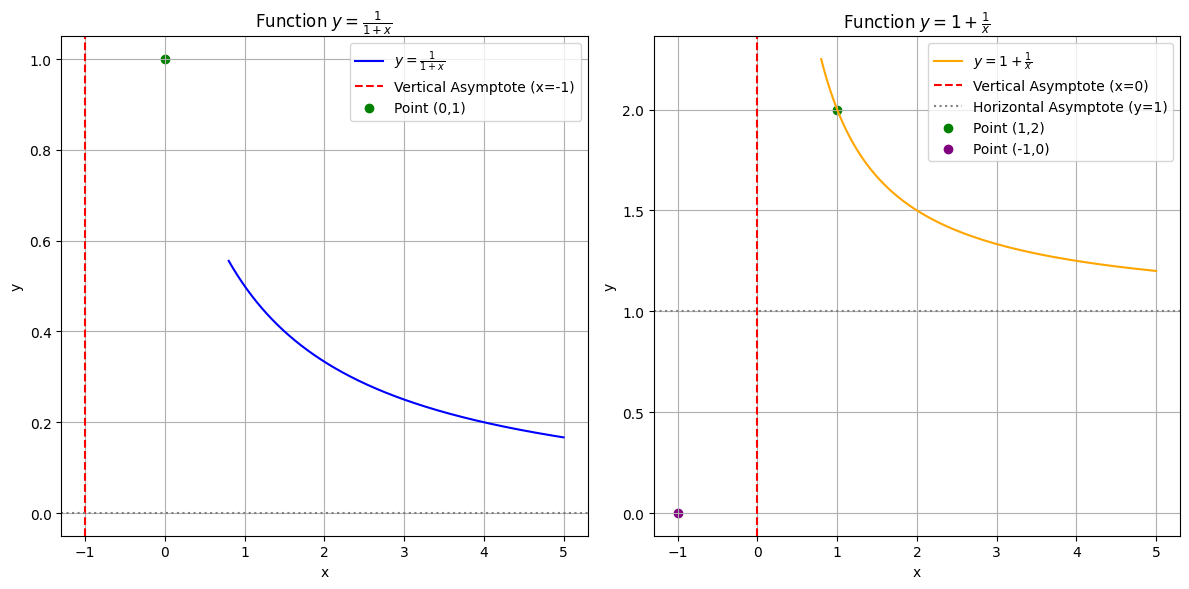

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def y1(x):
    return 1 / (1 + x)

def y2(x):
    return 1 + 1 / x

# 生成 x 值（避开奇点）
x1 = np.linspace(0.8, 5, 1000)
x1 = x1[~np.isclose(x1, -1, atol=0.01)]  # 排除 x ≈ -1

x2 = np.linspace(0.8, 5, 1000)
x2 = x2[~np.isclose(x2, 0, atol=0.01)]    # 排除 x ≈ 0

# 计算 y 值
y1_values = y1(x1)
y2_values = y2(x2)

# 创建画布
plt.figure(figsize=(12, 6))

# 绘制 y = 1/(1+x)
plt.subplot(1, 2, 1)
plt.plot(x1, y1_values, label=r'$y=\frac{1}{1+x}$', color='blue')
plt.axvline(x=-1, color='red', linestyle='--', label='Vertical Asymptote (x=-1)')
plt.axhline(y=0, color='gray', linestyle=':')
plt.scatter(0, 1, color='green', label='Point (0,1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Function $y=\frac{1}{1+x}$')
plt.legend()
plt.grid(True)

# 绘制 y = 1 + 1/x
plt.subplot(1, 2, 2)
plt.plot(x2, y2_values, label=r'$y=1+\frac{1}{x}$', color='orange')
plt.axvline(x=0, color='red', linestyle='--', label='Vertical Asymptote (x=0)')
plt.axhline(y=1, color='gray', linestyle=':', label='Horizontal Asymptote (y=1)')
plt.scatter(1, 2, color='green', label='Point (1,2)')
plt.scatter(-1, 0, color='purple', label='Point (-1,0)')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Function $y=1+\frac{1}{x}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
[map.graph.in_degree(idx) for idx in map.graph.node_indices()]

[2, 3, 2, 2, 3, 2]

In [54]:
sum([map.graph.out_degree(idx) for idx in map.graph.node_indices()]) / map.graph.num_nodes()

2.3333333333333335